In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt

gbm = pd.read_csv('gbm-data.csv')
gbm

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [2]:
massiv = gbm.values
massiv

array([[1.        , 0.        , 0.49700901, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.36666667, 0.60629148, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.0333    , 0.48012427, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.2       , 0.52056377, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.1       , 0.7656462 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.13333333, 0.53395198, ..., 0.        , 0.        ,
        0.        ]])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(massiv[0:,1:], massiv[0:,0], test_size = 0.8, random_state = 241)

      Iter       Train Loss   Remaining Time 
         1           1.0190           11.20s
         2           0.9192           11.28s
         3           0.8272           11.36s
         4           0.7834           11.31s
         5           0.7109           11.51s
         6           0.6368           11.22s
         7           0.5797           11.02s
         8           0.5610           11.00s
         9           0.5185           10.89s
        10           0.4984           10.81s
        20           0.1999           10.04s
        30           0.1313            9.50s
        40           0.0790            9.04s
        50           0.0511            8.43s
        60           0.0352            8.00s
        70           0.0245            7.51s
        80           0.0162            7.33s
        90           0.0114            7.00s
       100           0.0077            6.61s
       200           0.0004            1.89s


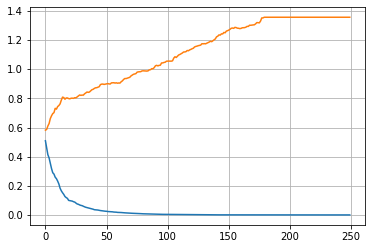

In [4]:
clf = GradientBoostingClassifier(n_estimators=250,verbose=True, random_state=241,learning_rate=1).fit(X_train, y_train)
clf.score(X_test, y_test)
best = []
loss = []
for y_pred in clf.staged_decision_function(X_train):
    loss.append(log_loss(y_train, 1.0 / (1.0 + np.exp(-y_pred))))
min_iter = np.argmin(loss)
min_loss = loss[min_iter]

loss_test = []
for y_pred in clf.staged_decision_function(X_test):
    loss_test.append(log_loss(y_test, 1.0 / (1.0 + np.exp(-y_pred))))
min_iter_test = np.argmin(loss_test)
min_loss_test = loss_test[min_iter]
best.append([min(loss_test),min_iter_test])

plt.figure()
plt.grid()
plt.plot(loss)  
plt.plot(loss_test)  

      Iter       Train Loss   Remaining Time 
         1           1.1255            9.71s
         2           1.0035            9.17s
         3           0.9386            8.82s
         4           0.8844            8.62s
         5           0.8381            8.43s
         6           0.7995            8.58s
         7           0.7559            8.85s
         8           0.7205            8.89s
         9           0.6958            9.03s
        10           0.6725            9.12s
        20           0.4672            9.18s
        30           0.3179            8.67s
        40           0.2274            8.31s
        50           0.1774            7.88s
        60           0.1394            7.79s
        70           0.1050            7.32s
        80           0.0805            6.84s
        90           0.0650            6.38s
       100           0.0511            5.91s
       200           0.0058            1.84s


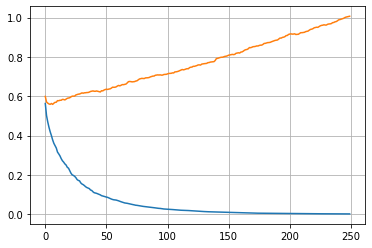

In [5]:
clf = GradientBoostingClassifier(n_estimators=250,verbose=True, random_state=241,learning_rate=0.5).fit(X_train, y_train)
clf.score(X_test, y_test)

loss = []
for y_pred in clf.staged_decision_function(X_train):
    loss.append(log_loss(y_train, 1.0 / (1.0 + np.exp(-y_pred))))
min_iter = np.argmin(loss)
min_loss = loss[min_iter]

loss_test = []
for y_pred in clf.staged_decision_function(X_test):
    loss_test.append(log_loss(y_test, 1.0 / (1.0 + np.exp(-y_pred))))
min_iter_test = np.argmin(loss_test)
min_loss_test = loss_test[min_iter]
best.append([min(loss_test),min_iter_test])

plt.figure()
plt.grid()
plt.plot(loss)  
plt.plot(loss_test)  

      Iter       Train Loss   Remaining Time 
         1           1.2095           10.45s
         2           1.1006           10.54s
         3           1.0240            9.71s
         4           0.9729            9.16s
         5           0.9387            9.01s
         6           0.8948            9.15s
         7           0.8621            9.64s
         8           0.8360            9.82s
         9           0.8171           10.01s
        10           0.7883           10.80s
        20           0.6029           10.22s
        30           0.4760            9.22s
        40           0.3879            8.86s
        50           0.3325            8.26s
        60           0.2759            7.68s
        70           0.2304            7.20s
        80           0.1969            6.92s
        90           0.1718            6.57s
       100           0.1404            6.18s
       200           0.0358            2.12s


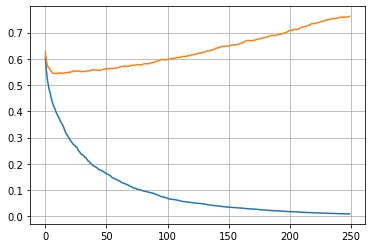

In [6]:
clf = GradientBoostingClassifier(n_estimators=250,verbose=True, random_state=241,learning_rate=0.3).fit(X_train, y_train)
clf.score(X_test, y_test)

loss = []
for y_pred in clf.staged_decision_function(X_train):
    loss.append(log_loss(y_train, 1.0 / (1.0 + np.exp(-y_pred))))
min_iter = np.argmin(loss)
min_loss = loss[min_iter]

loss_test = []
for y_pred in clf.staged_decision_function(X_test):
    loss_test.append(log_loss(y_test, 1.0 / (1.0 + np.exp(-y_pred))))
min_iter_test = np.argmin(loss_test)
min_loss_test = loss_test[min_iter]
best.append([min(loss_test),min_iter_test])

plt.figure()
plt.grid()
plt.plot(loss)  
plt.plot(loss_test)  

      Iter       Train Loss   Remaining Time 
         1           1.2613           10.20s
         2           1.1715            9.42s
         3           1.1009            9.79s
         4           1.0529           10.02s
         5           1.0130           10.19s
         6           0.9740           10.16s
         7           0.9475           10.38s
         8           0.9197           10.34s
         9           0.8979           10.33s
        10           0.8730           10.27s
        20           0.7207           10.15s
        30           0.6055            9.90s
        40           0.5244            9.62s
        50           0.4501            8.92s
        60           0.3908            8.45s
        70           0.3372            7.86s
        80           0.3009            7.35s
        90           0.2603            6.96s
       100           0.2327            6.41s
       200           0.0835            2.16s


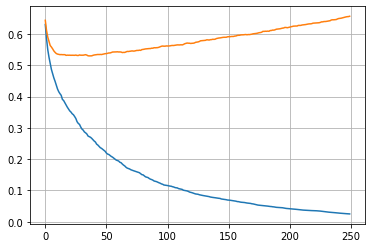

In [7]:
clf = GradientBoostingClassifier(n_estimators=250,verbose=True, random_state=241,learning_rate=0.2).fit(X_train, y_train)
clf.score(X_test, y_test)

loss = []
for y_pred in clf.staged_decision_function(X_train):
    loss.append(log_loss(y_train, 1.0 / (1.0 + np.exp(-y_pred))))
min_iter = np.argmin(loss)
min_loss = loss[min_iter]

loss_test = []
for y_pred in clf.staged_decision_function(X_test):
    loss_test.append(log_loss(y_test, 1.0 / (1.0 + np.exp(-y_pred))))
min_iter_test = np.argmin(loss_test)
min_loss_test = loss_test[min_iter]
best.append([min(loss_test),min_iter_test])

plt.figure()
plt.grid()
plt.plot(loss)  
plt.plot(loss_test)  

In [8]:
min(loss_test) # минимальное значение log-loss на тестовой выборке иномер итерации, на котором оно достигается, при learning_rate =0.2

0.5301645204906471

In [9]:
min_iter_test

36

      Iter       Train Loss   Remaining Time 
         1           1.3199           10.21s
         2           1.2645            9.05s
         3           1.2170            8.64s
         4           1.1775            8.43s
         5           1.1404            8.33s
         6           1.1106            8.46s
         7           1.0844            9.34s
         8           1.0617           10.30s
         9           1.0411           11.50s
        10           1.0223           11.89s
        20           0.8864           10.27s
        30           0.7844           10.02s
        40           0.7176            9.86s
        50           0.6590            9.37s
        60           0.6120            8.90s
        70           0.5599            8.21s
        80           0.5242            7.75s
        90           0.4829            7.24s
       100           0.4473            6.68s
       200           0.2379            2.11s


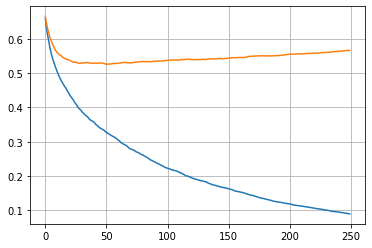

In [10]:
clf = GradientBoostingClassifier(n_estimators=250,verbose=True, random_state=241,learning_rate=0.1).fit(X_train, y_train)
clf.score(X_test, y_test)

loss = []
for y_pred in clf.staged_decision_function(X_train):
    loss.append(log_loss(y_train, 1.0 / (1.0 + np.exp(-y_pred))))
min_iter = np.argmin(loss)
min_loss = loss[min_iter]

loss_test = []
for y_pred in clf.staged_decision_function(X_test):
    loss_test.append(log_loss(y_test, 1.0 / (1.0 + np.exp(-y_pred))))
min_iter_test = np.argmin(loss_test)
min_loss_test = loss_test[min_iter]
best.append([min(loss_test),min_iter_test])

plt.figure()
plt.grid()
plt.plot(loss)  
plt.plot(loss_test)  

In [14]:
'overfitting'

'overfitting'

In [16]:
best

[[0.5822942594278475, 0],
 [0.5584259973942154, 6],
 [0.5432835808866866, 10],
 [0.5301645204906471, 36],
 [0.5259049090698129, 51]]

In [18]:
clf = RandomForestClassifier(n_estimators=51, random_state=241).fit(X_train, y_train)
round(log_loss(y_test,clf.predict_proba(X_test)),2)

0.54